In [1]:
import numpy as np
import os
from IPython.display import YouTubeVideo

In [2]:
def prepend_tags(entry):
    """
    Takes a dict with 'text' and 'tags', sorts tags alphabetically,
    and prepends them as special tokens to the text.
    
    Example input:
    {
        'speaker': 'grahampaige',
        'text': 'Virginia Freedom of Information Act... Do I have a second?',
        'tags': ['cite_external_source', 'procedural_move', 'ask_question']
    }
    """
    # Sort tags alphabetically
    sorted_tags = sorted(entry.get("tags", []))
    
    # Format tags as uppercase special tokens
    tag_tokens = " ".join(f"[{tag.upper()}]" for tag in sorted_tags)
    
    # Prepend to text
    new_text = f"{tag_tokens} {entry['text']}"
    
    # Return updated dict
    return {
        **entry,
        "text": new_text
    }

In [3]:
datasets = ['DCAppeals', 'Albermale', 'Waipa']
transcript_path = f'{datasets[0]}/transcripts'
transcript_files = os.listdir(transcript_path)
transcript_file = os.path.join(transcript_path, transcript_files[0])
video_id = transcript_file.split('/')[-1].replace('.npy','')
transcript = np.load(transcript_file, allow_pickle=True)

### Video File

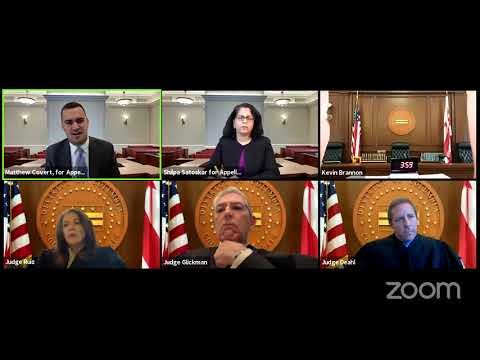

In [4]:
YouTubeVideo(video_id, width=640, height=360)

### With Action Tags

In [5]:
use_tags = True
for line in transcript[:5]:
    print('-'*115)
    if use_tags:
        line = prepend_tags(line)
    print('({} : {}) {}: {}'.format(line['start'], line['end'], line['speaker'], line['text']))
print('-'*115)

-------------------------------------------------------------------------------------------------------------------
(5.653 : 26.408) kevinbrannon: [COURT_OPENING]  All persons have in business before the Honorable Associate Judges, now residing on the District of Columbia Court of Appeals. Draw near and give your attention. God save the United States and this Honorable Court. This Honorable Court is now in session. Please come to order.
-------------------------------------------------------------------------------------------------------------------
(28.469 : 45.533) judgeglickman: [CASE_CALL] [COURT_OPENING] [COURT_PROCEDURAL_REMARK] [JUDGE_COMMENT] Good morning. Welcome to the virtual sitting of the District of Columbia Court of Appeals.  We have two cases on this morning's calendar. And we will call the first case, United States versus Khalil Pope. Mr. Colbert, you may proceed. Thank you, Your Honor.
----------------------------------------------------------------------------------

### Without Action Tags

In [9]:
use_tags = False
for line in transcript[:5]:
    print('-'*115)
    if use_tags:
        line = prepend_tags(line)
    print('({} : {}) {}: {}'.format(line['start'], line['end'], line['speaker'], line['text']))
print('-'*115)

-------------------------------------------------------------------------------------------------------------------
(5.653 : 26.408) kevinbrannon:  All persons have in business before the Honorable Associate Judges, now residing on the District of Columbia Court of Appeals. Draw near and give your attention. God save the United States and this Honorable Court. This Honorable Court is now in session. Please come to order.
-------------------------------------------------------------------------------------------------------------------
(28.469 : 45.533) judgeglickman: Good morning. Welcome to the virtual sitting of the District of Columbia Court of Appeals.  We have two cases on this morning's calendar. And we will call the first case, United States versus Khalil Pope. Mr. Colbert, you may proceed. Thank you, Your Honor.
-------------------------------------------------------------------------------------------------------------------
(46.313 : 139.318) mattcohen: Good morning. Matthew 

In [6]:
line

{'start': 153.432,
 'end': 209.984,
 'text': "[FACT_STATEMENT] [SUBSTANTIVE_ARGUMENT] Yes, Your Honor. And that comes primarily from the statements of Sheila, Rob, and Mr. Pope on the body-worn camera footage. Go ahead.  I was gonna say, when asked where he lives, Mr. Pope provided an address in Washington DC and an address in Maryland, neither of which were 459 Riggs Road, where the search was located. When asked if he had a room at the house, he said no. When asked if he lived at the house, he said no.  Aunt Sheila, who Mr. Pope testified was not a blood aunt, but sort of a friendly familial relative, she said that he hadn't been here in a minute. And Rob, Cousin Rob said the same thing. Rob also said that he told Mr. Pope not to come around here anymore. So when you- Didn't he say he should have kept it that way?",
 'speaker': 'mattcohen',
 'tags': ['substantive_argument', 'fact_statement']}

In [8]:
transcript_files

['PNezZ7ZVdZg.npy',
 'KyowCi4XjFY.npy',
 'aMogEeaR7gk.npy',
 '9eQBDSkQtbE.npy',
 'L7YvAYE3gjE.npy',
 'cV2weQyI-bM.npy',
 'q4IwNXdU2eI.npy',
 '1bASOXdKHkc.npy',
 'CQKG9RtypFU&t.npy',
 'e3z60M6zXB0.npy']

In [11]:
import numpy as np
import json
from pathlib import Path

# Folder containing .npy files
npy_folder = Path("Waipa/transcripts")
json_folder = Path("Waipa/transcripts_json")
json_folder.mkdir(exist_ok=True)

# Iterate through all .npy files
for npy_file in npy_folder.glob("*.npy"):
    # Load numpy array
    data = np.load(npy_file, allow_pickle=True)
    
    # Ensure it's a list of dicts
    records = data.tolist()  # usually npy saved with dtype=object
    
    # Save as JSON
    json_file = json_folder / (npy_file.stem + ".json")
    with open(json_file, "w", encoding="utf-8") as f:
        json.dump(records, f, indent=2)

    print(f"Converted {npy_file} -> {json_file}")


Converted Waipa/transcripts/U1sfOWRjMHM.npy -> Waipa/transcripts_json/U1sfOWRjMHM.json
Converted Waipa/transcripts/VwGkYm0PMlI.npy -> Waipa/transcripts_json/VwGkYm0PMlI.json
Converted Waipa/transcripts/HVzuolLYZGo.npy -> Waipa/transcripts_json/HVzuolLYZGo.json
Converted Waipa/transcripts/ugwbGC-HT2k.npy -> Waipa/transcripts_json/ugwbGC-HT2k.json
Converted Waipa/transcripts/4P8qdLUwgBU.npy -> Waipa/transcripts_json/4P8qdLUwgBU.json
Converted Waipa/transcripts/V2hBeV3yBrQ.npy -> Waipa/transcripts_json/V2hBeV3yBrQ.json
Converted Waipa/transcripts/bysieDSOTKA.npy -> Waipa/transcripts_json/bysieDSOTKA.json
Converted Waipa/transcripts/ONvKyeTCBEY.npy -> Waipa/transcripts_json/ONvKyeTCBEY.json
Converted Waipa/transcripts/mpRa5R2JD_Q.npy -> Waipa/transcripts_json/mpRa5R2JD_Q.json
Converted Waipa/transcripts/hGwSoc7CFic.npy -> Waipa/transcripts_json/hGwSoc7CFic.json
Converted Waipa/transcripts/Q0Z45UI7xiQ.npy -> Waipa/transcripts_json/Q0Z45UI7xiQ.json
Converted Waipa/transcripts/dFgnBziorTk.npy